# Summer Analytics Capstone Project by C&A Club, IIT Guwahati

This challenge is the capstone project of the Summer Analytics, a primer course on Data Science, conducted by Consulting and Analytics Club of IIT Guwahati in the summers. 
The dataset is provided by DeltaX. DeltaX is the pioneering cross-channel digital advertising platform. The cloud-based platform leverages big data, user behavior, and machine learning algorithms to improve performance across the business funnel of advertisers.

## Problem Statement

Let's take a case where an advertiser on the platform (DeltaX) would like to estimate the performance of their campaign in the future. Imagine it is the first day of March and you are given the past performance data of ads between 1st August to 28th Feb. You are now tasked to predict an ad's future performance (revenue) between March 1st and March 15th.

## Data Description

Given data is the ad performance for the dates between 1st August 2020 and 28th Feb 2021. It contains various columns whose description is as follows  
date: the date on which the ad was made live  
campaign: campaign number  
adgroup: adgroup number  
ad: ad number  
impressions - Number of time the ad was shown  
clicks - Number of time the ad clicked shown  
cost - Amount spent to show ad  
conversions - Number of transactions received  
revenue: revenue generated from the ad

# Getting Started

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import lightgbm as lgb
import catboost as cb
import warnings 
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('Hack_Train_Data.csv',parse_dates=True,index_col='date')
test_df = pd.read_csv('Hack_Test_Data.csv',parse_dates=True,index_col='date')
df = pd.concat([train_df,test_df])

In [3]:
df.head()

,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
date,,,,,,,,
2020-01-08,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
2020-01-08,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2020-01-08,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
2020-01-08,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
2020-01-08,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


In [4]:
df.describe()

,impressions,clicks,cost,conversions,revenue
count,4889.000000,4889.000000,4889.000000,4889.000000,4571.000000
mean,90.977705,42.454899,2.643461,1.304357,231.865340
std,193.610988,97.591346,13.900229,5.073662,1091.742763
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,2.000000,0.040000,0.000000,0.000000
50%,16.000000,7.000000,0.190000,0.000000,0.000000
75%,85.000000,38.000000,1.260000,1.000000,92.600000
max,3239.000000,1771.000000,531.250000,94.000000,20515.410000


# Initial Checking 

In [5]:
train_df.head()

,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
date,,,,,,,,
2020-01-08,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
2020-01-08,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2020-01-08,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
2020-01-08,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
2020-01-08,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


In [6]:
test_df.head()

,campaign,adgroup,ad,cost,impressions,clicks,conversions
date,,,,,,,
2021-01-03,campaign 1,adgroup 1,ad 1,0.58,121,49,1
2021-01-03,campaign 1,adgroup 3,ad 1,0.17,22,12,0
2021-01-03,campaign 1,adgroup 4,ad 1,0.05,5,3,0
2021-01-03,campaign 1,adgroup 2,ad 1,0.01,2,1,0
2021-01-03,campaign 1,adgroup 2,ad 2,0.01,3,1,0


In [7]:
train_df.isnull().sum()

campaign       0
adgroup        0
ad             0
impressions    0
clicks         0
cost           0
conversions    0
revenue        0
dtype: int64

In [8]:
test_df.isnull().sum()

campaign       0
adgroup        0
ad             0
cost           0
impressions    0
clicks         0
conversions    0
dtype: int64

In [9]:
print(train_df.campaign.value_counts())
print(test_df.campaign.value_counts())

campaign 1    4571
Name: campaign, dtype: int64
campaign 1    318
Name: campaign, dtype: int64


# Visualisation

In [10]:
sns.set(rc={"figure.figsize":(12, 5)});

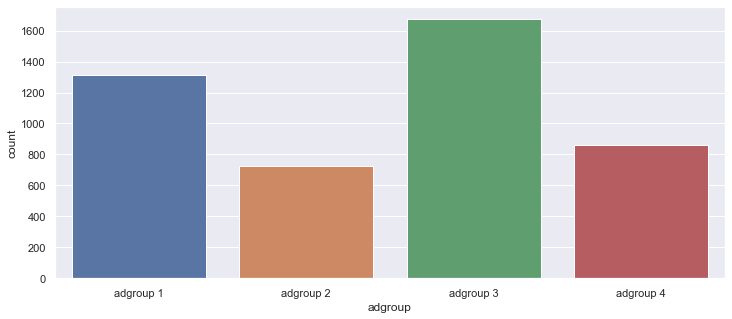

In [11]:
sns.countplot(x=train_df.adgroup);

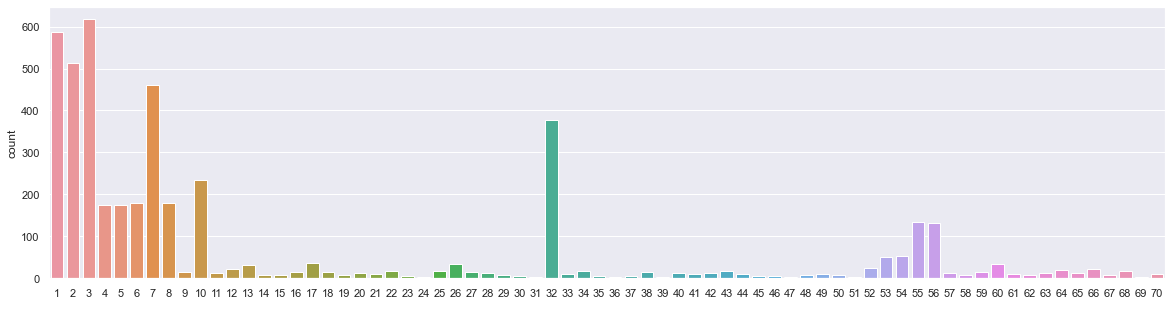

In [12]:
labels = np.arange(1,71)
sns.set(rc={"figure.figsize":(20, 5)});
ax = sns.countplot(x = train_df.ad);
ax.set(xlabel=' ');
ax.set_xticklabels(labels);

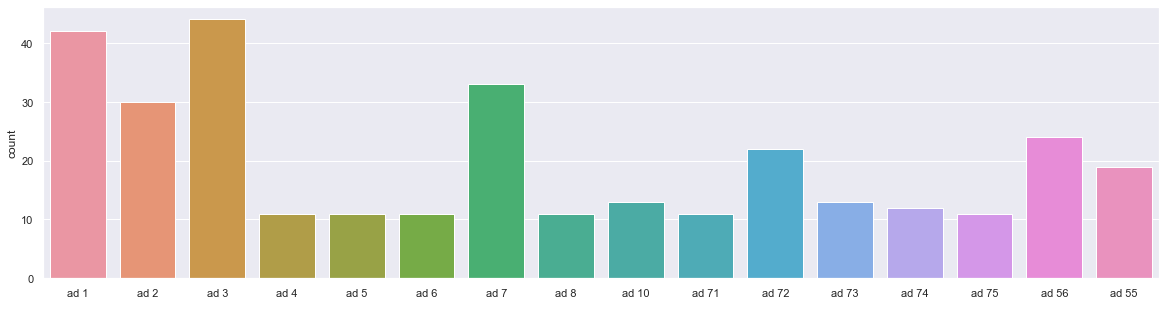

In [13]:
ax = sns.countplot(x = test_df.ad);
ax.set(xlabel=' ');

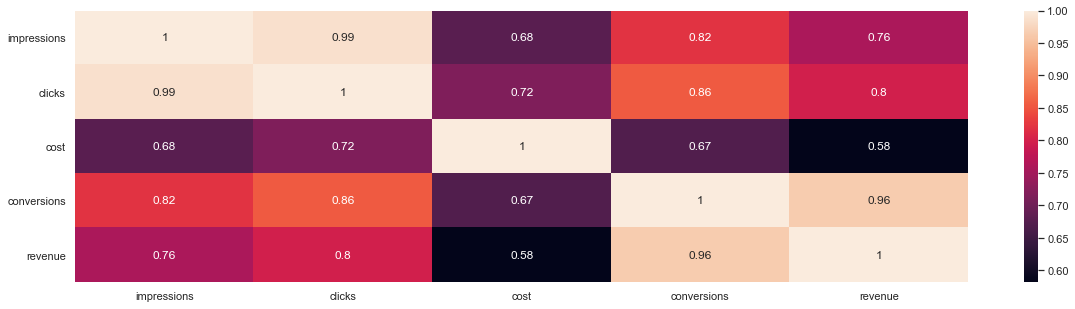

In [14]:
sns.heatmap(df.corr(),annot = True);

<AxesSubplot:xlabel='adgroup', ylabel='revenue'>

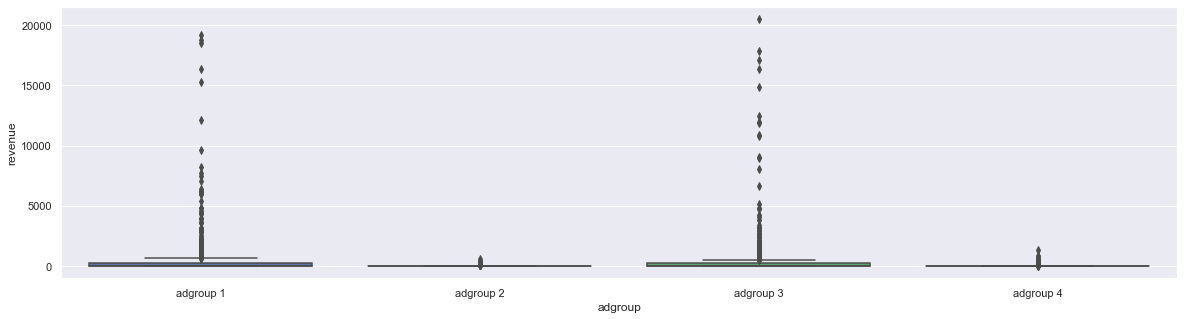

In [15]:
sns.boxplot(x = train_df.adgroup, y=train_df.revenue)

Almost on every day revenue generated is zero for adgroup 2 and 4. This is in contrast to adgroups 1 and 3

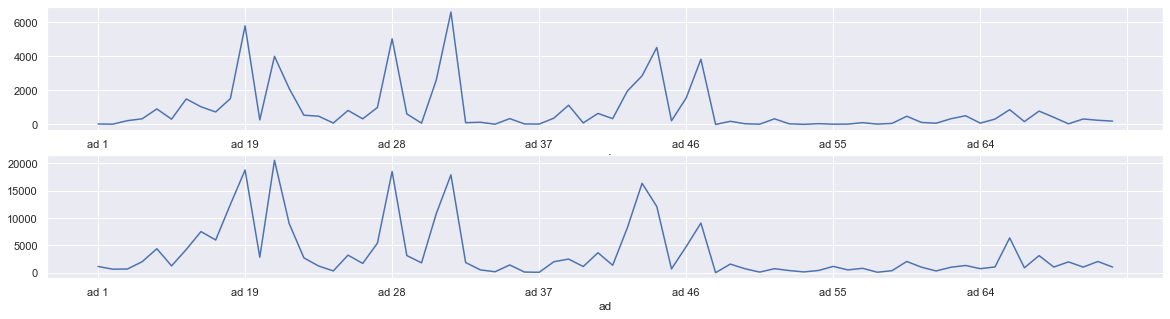

In [16]:
plt.subplot(2,1,1)
train_df.groupby('ad').revenue.mean().plot();
plt.subplot(2,1,2)
train_df.groupby('ad').revenue.max().plot();

Some ads perform much better compared to others

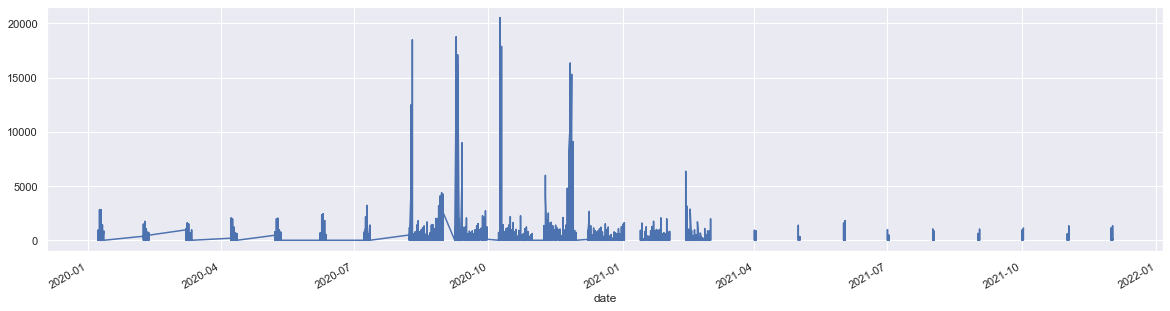

In [17]:
df.revenue.plot(figsize=(20,5));

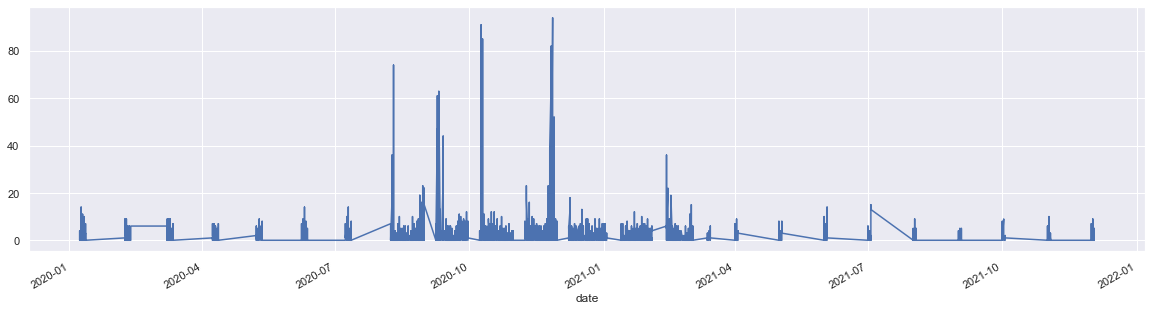

In [18]:
df.conversions.plot(figsize=(20,5));

<AxesSubplot:xlabel='date'>

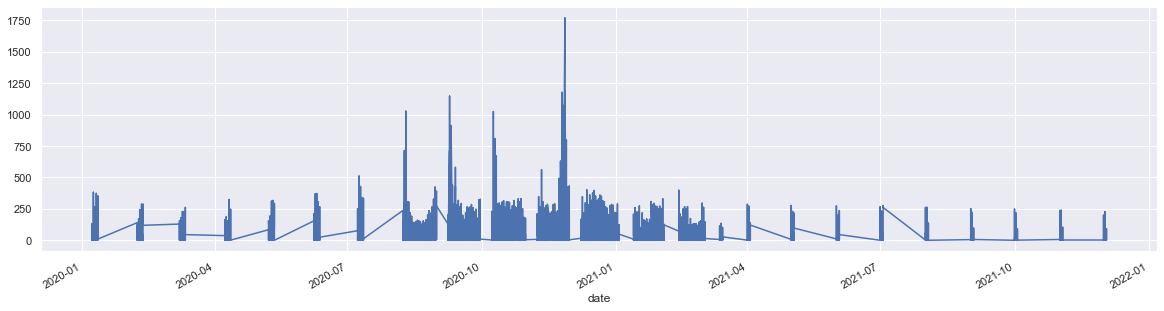

In [19]:
df.clicks.plot(figsize=(20,5))

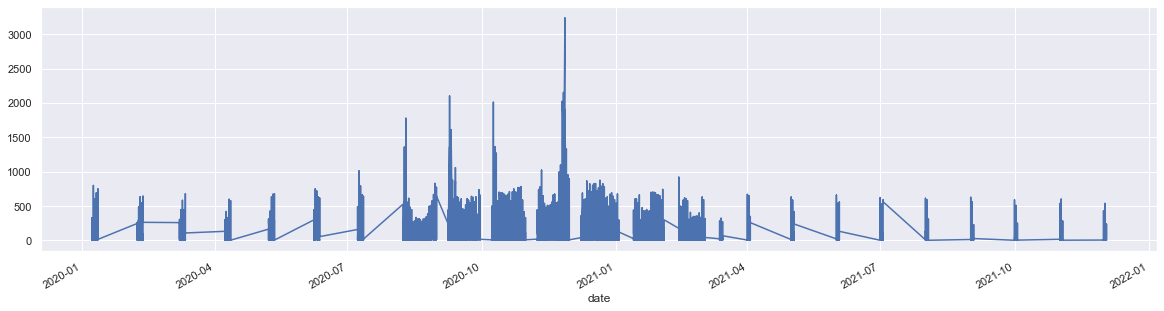

In [20]:
df.impressions.plot(figsize=(20,5));

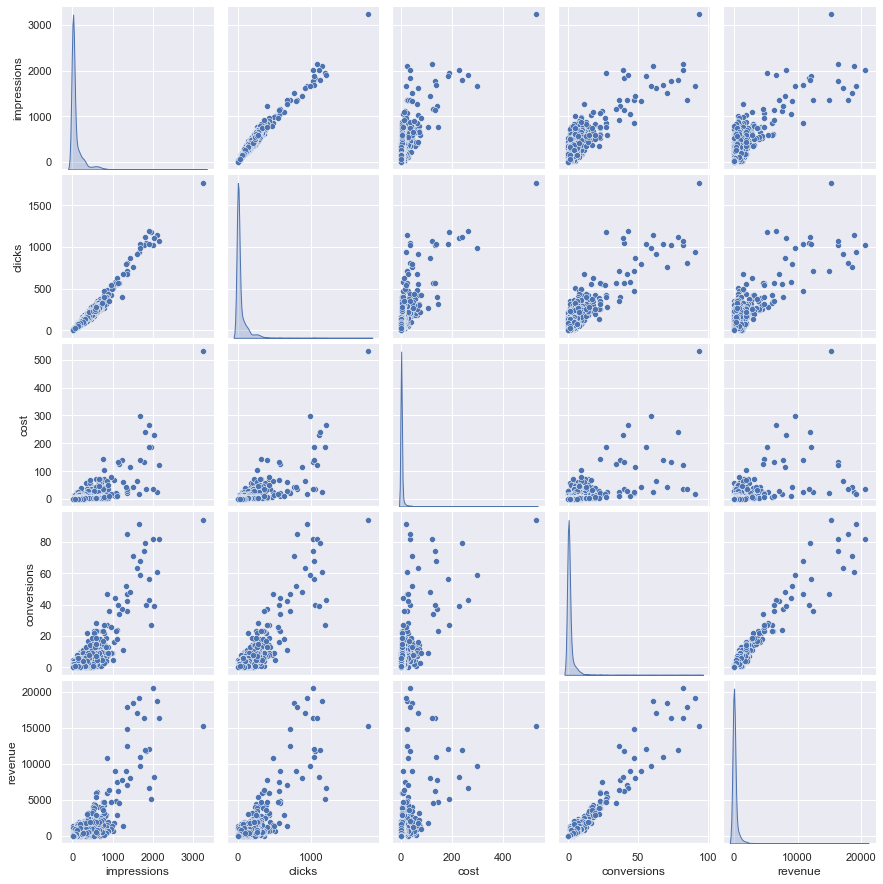

In [21]:
sns.pairplot(data=df,diag_kind='kde');

In [22]:
df[(df['conversions']==0)].revenue.max()

0.0

Whenever conversions is zero, revenue is zero in entire data, which makes sense, as no transactions would mean no revenue

In [23]:
df[(df['revenue']==0)].conversions.max()

3

Revenue can be zero without conversions being zero


# Feature Engineering



CTR - Clicks / Impression (higher the better - used to evaluate if the users find the ad relevant)  
CPC - Cost / Click (lower the better - used to evaluate if the cost for getting a click)  
CPA - Cost / Conversion (lower the better - used to evaluate if the cost for getting a conversion)  
ROI - Revenue/Cost (higher the better - used to evaluate the effectiveness of the advertising budget spent  

In [24]:
df['CPC'] = df['cost']/df['impressions']
df['CTR'] = df['clicks']/df['impressions']
df['CPA'] = df['cost']/df['conversions']
df['ROI'] = df['revenue']/df['cost']

## Advalue imputer

In [25]:
ad_value={}
for ad in train_df.groupby('ad').revenue.mean().index:
  ad_value[ad] = train_df.groupby('ad').revenue.mean()[ad]
total_median = train_df.groupby('ad').revenue.mean().median()
total_median

324.80083333333334

In [26]:
def meanimputer(ad):
  if ad in ad_value:
    return ad_value[ad]
  else:
    return total_median

In [27]:
df['ad_value'] = df['ad'].apply(meanimputer)

In [28]:
# Taking relevance of ad into picture
df['ad_value3'] = df['ad_value']*df['CTR']

## ROI Imputer

In [29]:
# ROI imputer
mean = df['ROI'].mean()
def roi(val):
  if val[1] == 0 and val[2] == 0:
    return mean
  else :
    return val[0]

In [30]:
df['ROI'] = df[['ROI','cost','revenue']].apply(roi,axis=1)

In [31]:
df['ROI'].isnull().sum()

318

## CPA misssing values filling

In [32]:
df['CPA'].median()

inf

In [33]:
df.CPA.fillna(value=df.CPA.median(),inplace=True)

## Average ROI for various ads

In [34]:
ad_value={}
for ad in df.groupby('ad').ROI.mean().index:
  ad_value[ad] = df.groupby('ad').ROI.mean()[ad]

total_group_median = df.groupby('adgroup').ROI.mean().mean()
total_median = df.groupby('ad').ROI.mean().mean()

In [35]:
def adimputer(ad):
  if ad in ad_value and str(ad_value[ad]) != 'nan':
    return ad_value[ad]
  else:
    return total_median

In [36]:
df['ad_value2'] = df['ad'].apply(adimputer)
df['ad_value4'] = df['ad_value2']*df['CTR']

In [37]:
def function(ad):
  getval = int(ad[3:])
  if ad in test_df.ad.unique() and ad in train_df.ad.unique():
    return getval
  else:
    return 0

In [38]:
df.head()

,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue,CPC,CTR,CPA,ROI,ad_value,ad_value3,ad_value2,ad_value4
date,,,,,,,,,,,,,,,,
2020-01-08,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00,0.003333,0.250000,inf,0.000000,27.021073,6.755268,157.440141,39.360035
2020-01-08,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00,0.000000,0.000000,inf,169.080644,27.021073,0.000000,157.440141,0.000000
2020-01-08,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00,0.003077,0.307692,inf,0.000000,27.021073,8.314176,157.440141,48.443120
2020-01-08,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00,0.016000,0.800000,inf,0.000000,27.021073,21.616859,157.440141,125.952113
2020-01-08,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71,0.005223,0.510121,0.3225,717.604651,266.649473,136.023618,185.829749,94.795742


In [39]:
df.isnull().sum()

campaign         0
adgroup          0
ad               0
impressions      0
clicks           0
cost             0
conversions      0
revenue        318
CPC              0
CTR              0
CPA              0
ROI            318
ad_value         0
ad_value3        0
ad_value2        0
ad_value4        0
dtype: int64

# One Hot encoding

In [40]:
df =  pd.get_dummies(df,columns=['adgroup'],drop_first=True)
df

,campaign,ad,impressions,clicks,cost,conversions,revenue,CPC,CTR,CPA,ROI,ad_value,ad_value3,ad_value2,ad_value4,adgroup_adgroup 2,adgroup_adgroup 3,adgroup_adgroup 4
date,,,,,,,,,,,,,,,,,,
2020-01-08,campaign 1,ad 1,24,6,0.08,0,0.00,0.003333,0.250000,inf,0.000000,27.021073,6.755268,157.440141,39.360035,0,0,0
2020-01-08,campaign 1,ad 1,1,0,0.00,0,0.00,0.000000,0.000000,inf,169.080644,27.021073,0.000000,157.440141,0.000000,1,0,0
2020-01-08,campaign 1,ad 1,13,4,0.04,0,0.00,0.003077,0.307692,inf,0.000000,27.021073,8.314176,157.440141,48.443120,0,1,0
2020-01-08,campaign 1,ad 1,5,4,0.08,0,0.00,0.016000,0.800000,inf,0.000000,27.021073,21.616859,157.440141,125.952113,0,0,1
2020-01-08,campaign 1,ad 2,247,126,1.29,4,925.71,0.005223,0.510121,0.3225,717.604651,266.649473,136.023618,185.829749,94.795742,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-15,campaign 1,ad 55,1,1,0.01,0,NaN,0.010000,1.000000,inf,NaN,14.092463,14.092463,284.412247,284.412247,0,0,1
2021-03-15,campaign 1,ad 55,5,1,0.01,0,NaN,0.002000,0.200000,inf,NaN,14.092463,2.818493,284.412247,56.882449,0,1,0
2021-03-15,campaign 1,ad 55,25,11,0.14,0,NaN,0.005600,0.440000,inf,NaN,14.092463,6.200684,284.412247,125.141389,0,0,0


In [41]:
len(df.columns)

18

# Drop Irrelevant columns

In [42]:
df = df.drop(columns=['campaign','ad','ROI','ad_value','ad_value2'])
df.head()

,impressions,clicks,cost,conversions,revenue,CPC,CTR,CPA,ad_value3,ad_value4,adgroup_adgroup 2,adgroup_adgroup 3,adgroup_adgroup 4
date,,,,,,,,,,,,,
2020-01-08,24,6,0.08,0,0.00,0.003333,0.250000,inf,6.755268,39.360035,0,0,0
2020-01-08,1,0,0.00,0,0.00,0.000000,0.000000,inf,0.000000,0.000000,1,0,0
2020-01-08,13,4,0.04,0,0.00,0.003077,0.307692,inf,8.314176,48.443120,0,1,0
2020-01-08,5,4,0.08,0,0.00,0.016000,0.800000,inf,21.616859,125.952113,0,0,1
2020-01-08,247,126,1.29,4,925.71,0.005223,0.510121,0.3225,136.023618,94.795742,0,0,0


In [43]:
df.isna().sum()

impressions            0
clicks                 0
cost                   0
conversions            0
revenue              318
CPC                    0
CTR                    0
CPA                    0
ad_value3              0
ad_value4              0
adgroup_adgroup 2      0
adgroup_adgroup 3      0
adgroup_adgroup 4      0
dtype: int64

# Train Test split

In [44]:
train_data = df[df['revenue'].notna()]
train_data.tail() 
test_data = df[df['revenue'].isna()]
test_data.tail() 
test_data = test_data.drop(columns=['revenue'])

In [45]:
test_data.head()

,impressions,clicks,cost,conversions,CPC,CTR,CPA,ad_value3,ad_value4,adgroup_adgroup 2,adgroup_adgroup 3,adgroup_adgroup 4
date,,,,,,,,,,,,
2021-01-03,121,49,0.58,1,0.004793,0.404959,0.58,10.942418,63.756751,0,0,0
2021-01-03,22,12,0.17,0,0.007727,0.545455,inf,14.738767,85.876441,0,1,0
2021-01-03,5,3,0.05,0,0.010000,0.600000,inf,16.212644,94.464085,0,0,1
2021-01-03,2,1,0.01,0,0.005000,0.500000,inf,13.510537,78.720071,1,0,0
2021-01-03,3,1,0.01,0,0.003333,0.333333,inf,88.883158,61.943250,1,0,0


In [46]:
X = train_data.drop(columns=['revenue'])
y = train_data.revenue
X_train = X[:3200]
y_train = y[:3200]
X_valid = X[3200:]
y_valid = y[3200:]

# Cat Boost 

In [47]:
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_valid, y_valid)
cbreg = cb.CatBoostRegressor(loss_function='RMSE',logging_level='Silent')
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.01,0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
cbreg.grid_search(grid, train_dataset,verbose=False);

In [48]:
y_pred = cbreg.predict(X_valid);
print(mean_squared_error(y_valid,y_pred,squared=False));

123.06351279000029


# Lightboost

In [49]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['rmse'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'min_split_gain':0.0,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000,
    "n_estimators": 1000,  
    
}

In [50]:
gbm = lgb.LGBMRegressor(**hyper_params)

In [51]:
gbm.fit(X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        eval_metric='rmse',
        early_stopping_rounds = 1000,
        verbose=False,
       )

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001243 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_w

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, feature_fraction=0.9,
              learning_rate=0.005, max_bin=512, max_depth=8, metric=['rmse'],
              n_estimators=1000, num_iterations=100000, num_leaves=128,
              objective='regression', task='train', verbose=0)

In [52]:
y_pred = gbm.predict(X_valid)
mean_squared_error(y_pred,y_valid,squared=False)

133.63066961532246

# Xgboost

In [53]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [54]:
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [0.1,0.03, 0.01], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [100,150,200,500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)
xgb_grid.fit(X_train,y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    8.2s
[Parallel(n_jobs=5)]: Done  72 out of  72 | elapsed:   13.8s finished


0.8010285221543727
{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 200, 'nthread': 4, 'objective': 'reg:squarederror', 'subsample': 0.7}


In [55]:
params = {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 200, 'nthread': 4, 'objective': 'reg:squarederror', 'subsample': 0.7}
xgb = XGBRegressor(**params)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=7,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=4, nthread=4, num_parallel_tree=1,
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.7, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [56]:
y_pred = xgb.predict(X_valid)
print(mean_squared_error(y_valid,y_pred,squared=False));

120.61872234792547


In [57]:
xgb.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=7,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=4, nthread=4, num_parallel_tree=1,
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.7, tree_method='exact', validate_parameters=1,
             verbosity=None)

# Generating Predictions

In [58]:
# predictions = xgb.predict(test_data)
# predictions = gbm.predict(test_data)
predictions = cbreg.predict(test_data)

# Feature Importance

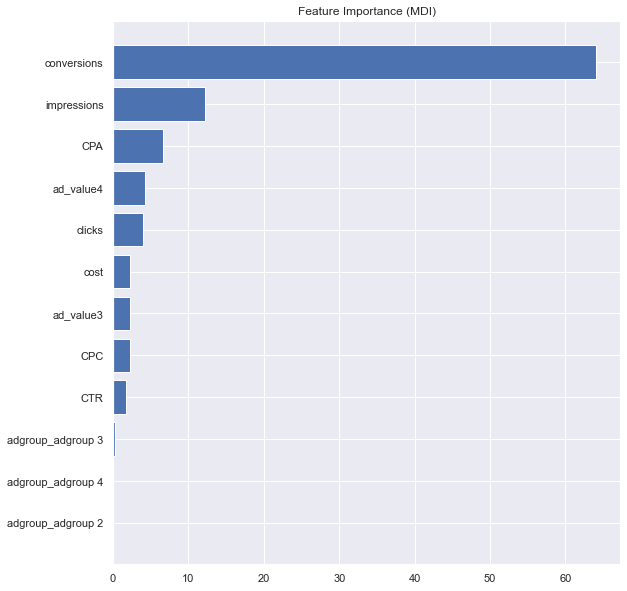

In [59]:
feature_importance = cbreg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')
plt.show()

# Wrapping up

In [60]:
fin_df = test_data[['conversions']].copy()
fin_df['revenue'] = predictions
fin_df

,conversions,revenue
date,,
2021-01-03,1,185.848045
2021-01-03,0,-4.538436
2021-01-03,0,-8.842053
2021-01-03,0,-5.461415
2021-01-03,0,-0.631397
...,...,...
2021-03-15,0,-4.410469
2021-03-15,0,-6.577500
2021-03-15,0,4.675206


In [61]:
# Function to place 0 revenue wherever there is zero conversion
def funct(pred):
    if pred[0]==0:
        return 0;
    elif pred[1]<0:
        return 0;
    else:
        return pred[1];

In [62]:
fin_df['revenue'] = fin_df[['conversions','revenue']].apply(funct,axis=1)

In [63]:
fin_df

,conversions,revenue
date,,
2021-01-03,1,185.848045
2021-01-03,0,0.000000
2021-01-03,0,0.000000
2021-01-03,0,0.000000
2021-01-03,0,0.000000
...,...,...
2021-03-15,0,0.000000
2021-03-15,0,0.000000
2021-03-15,0,0.000000


In [64]:
fin_df = fin_df[['revenue']]
fin_df = fin_df.set_index('revenue')

In [65]:
fin_df

""
revenue
185.848045
0.000000
0.000000
0.000000
0.000000
...
0.000000
0.000000
0.000000


In [66]:
fin_df.index.max()

2348.1051807603244

In [67]:
fin_df.to_csv("XgBoost.csv")